#Case: Using activation fuction 'ReLU' after BN and L2 regularization and using Image normalization <br>  *Observation: Validation accuracy(99.56*%)

##Import Libraries and modules

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


##Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [0]:
def get_mnist_labels():
    return list(range(0, 10))

(60000, 28, 28)


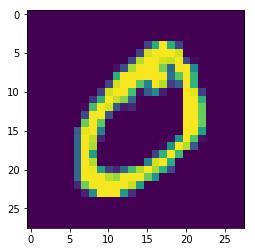

In [188]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [191]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [193]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [204]:
# Main model
from keras.layers import Activation
from keras.regularizers import l2
model = Sequential()
 
model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.01),)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1,kernel_regularizer=l2(0.01))) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regula

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_99 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_126 (Activation)  (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_100 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_127 (Activation)  (None, 24, 24, 32)        0         
__________

In [0]:
# Compile model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [208]:
# Image normalization
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)
datagen.fit(X_train)

train_iterator = datagen.flow(X_train, Y_train, batch_size=64,shuffle=True)
test_iterator =  datagen.flow(X_test, Y_test, batch_size=64,shuffle=True)   

train_model = model.fit_generator(train_iterator,steps_per_epoch=int(np.ceil(len(X_train)/128)),epochs=40, verbose=1, 
                    validation_data=test_iterator,validation_steps = int(np.ceil(len(X_test)/128)), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 33s 70ms/step - loss: 0.9971 - acc: 0.8193 - val_loss: 0.7739 - val_acc: 0.8362
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 13s 27ms/step - loss: 0.4296 - acc: 0.8939 - val_loss: 0.2473 - val_acc: 0.9673
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 13s 27ms/step - loss: 0.3725 - acc: 0.9070 - val_loss: 0.1857 - val_acc: 0.9775
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================] - 13s 27ms/step - loss: 0.3321 - acc: 0.9191 - val_loss: 0.1566 - val_acc: 0.9828
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
469/469 [==============================] - 12s 26ms/step - loss: 0.2991 - acc: 0.9268

In [209]:
# validation accuracy
print("Score",(train_model.history['val_loss'][-5],train_model.history['val_acc'][-5]))

Score (0.04221429177128469, 0.9956070287539937)


In [0]:
# function for plotting misclassified images 
def misclassified_images(X, Y, Y_pred, classes,columns=5,total=25,pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y, axis=1)
    yp = np.argmax(Y_pred, axis=1)
    misclassified = y_true != yp
    X = X[misclassified]
    Y = Y[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))
    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))
    X = np.take(X, indexes, axis=0)
    Y = np.take(Y, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)
    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier
    fig = plt.figure(figsize=(fig_width, fig_height))
    idx1 = 0
    idx2 = 0
    jdx = 0
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_title("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1

        for column in range(columns):
            if idx2 >= len(Y_pred):
                break
            yps = Y_pred[idx2]
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            ind = np.arange(len(classes))
            rects = ax.bar(ind, yps, 0.25, label='Labels')
            ax.set_ylabel('Probability')
            ax.set_yticks(np.arange(0, 1.2, 0.2))
            #ax.set_title('Probability vs Labels')
            ax.set_xticks(ind)
            ax.set_xticklabels(classes)
            ax.legend()
            idx2 += 1
            jdx += 1
    plt.show()

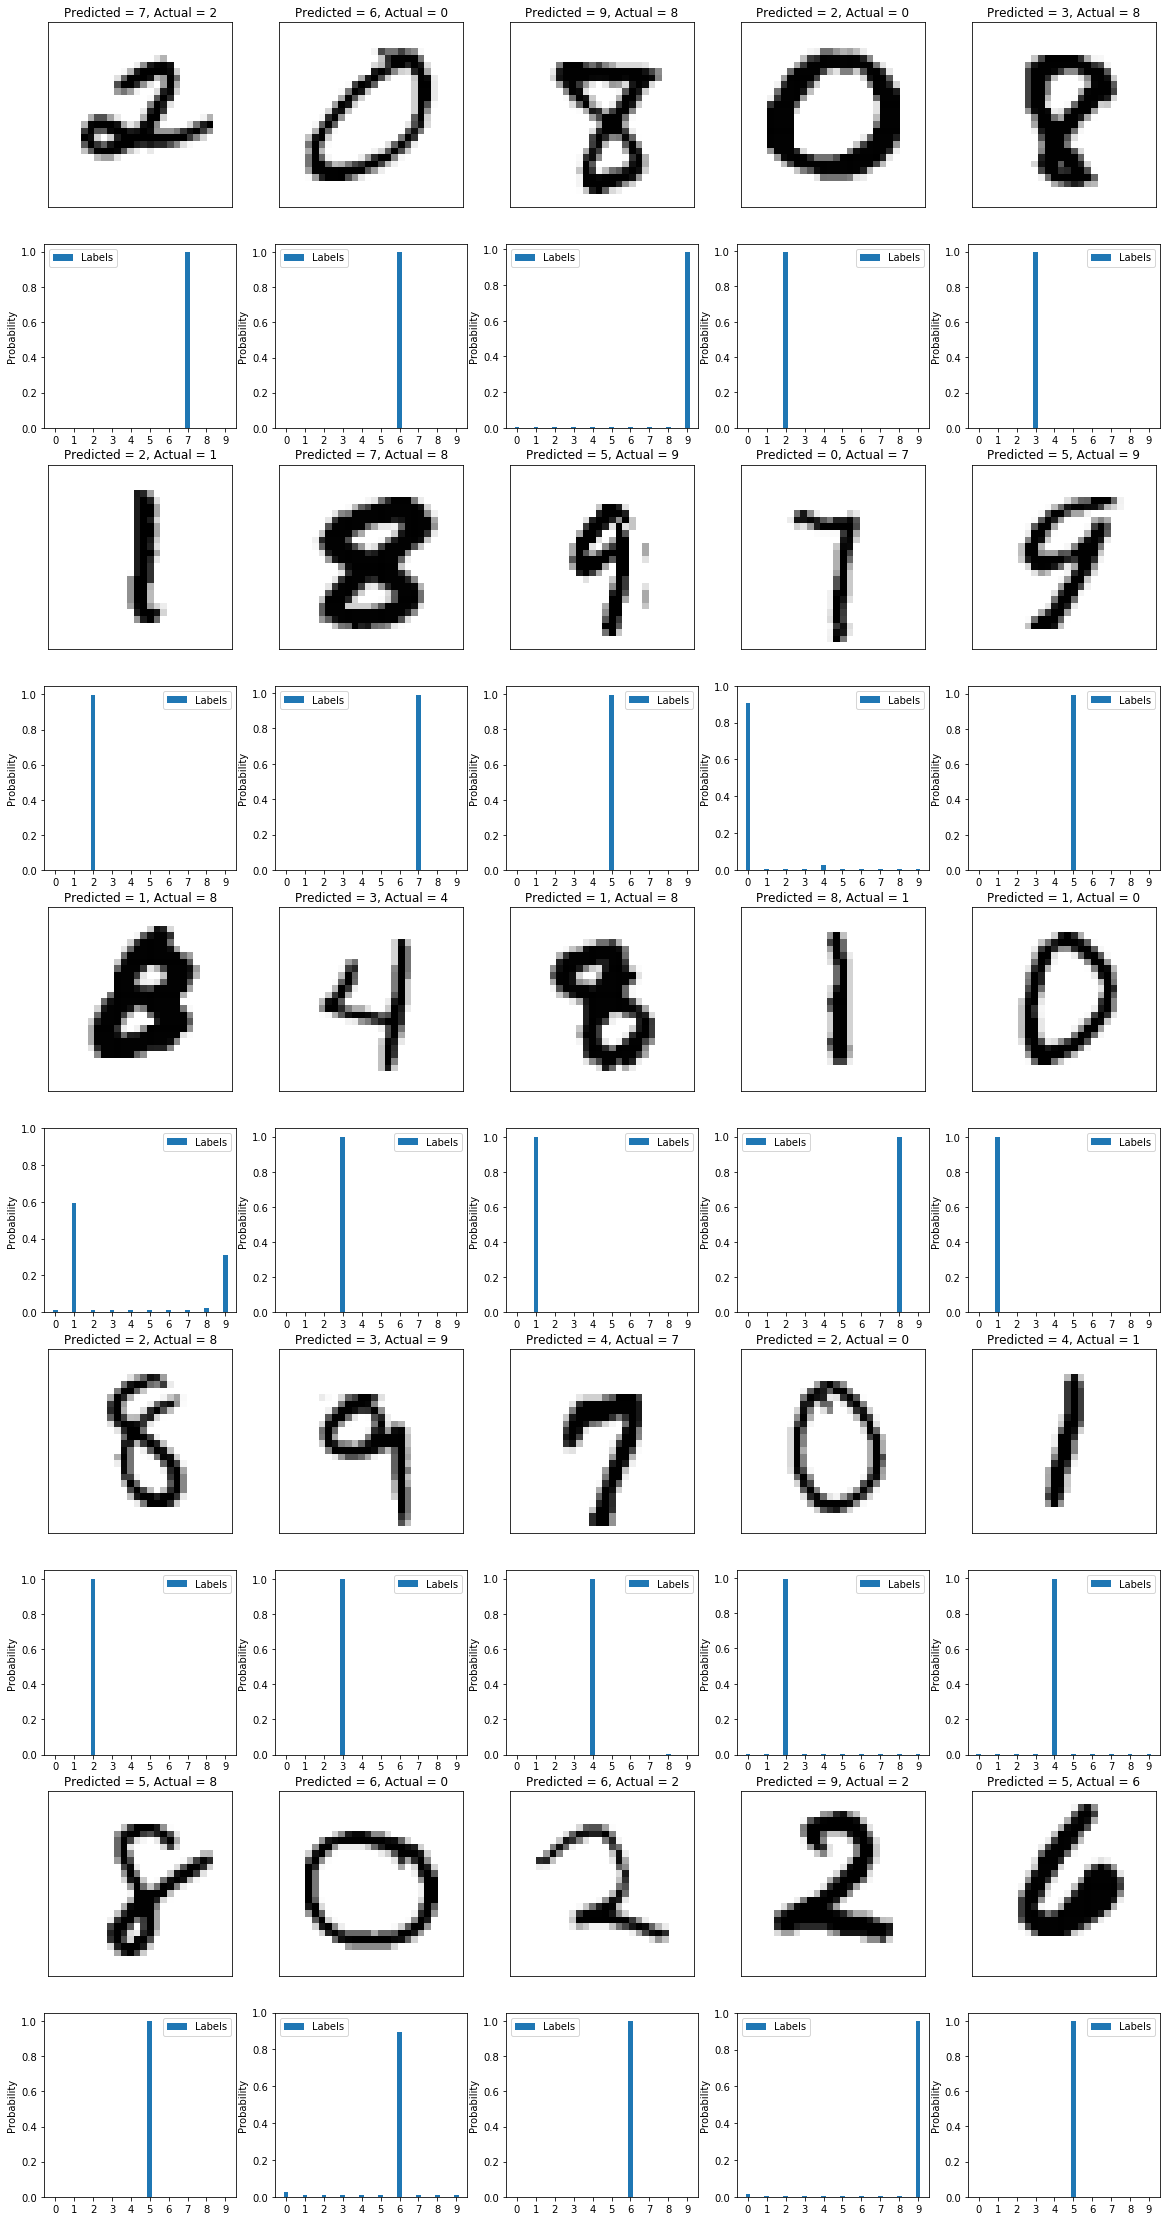

In [211]:
# 25 misclassified image gallery
misclassified_images(X_test, Y_test, predictions[:len(Y_test)], columns=5, total=25,classes=get_mnist_labels(), pick_randomly=True, image_size_multiplier=4)